In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import itertools
import ast

In [2]:
""" MusicOSet """

fp = "../data/musicoset_metadata/songs.csv"
df_songs_meta = pd.read_csv(fp, sep='\t')
print("SONGS")
print(df_songs_meta.head())

fp = "../data/musicoset_metadata/artists.csv"
df_artists_meta = pd.read_csv(fp, sep='\t')
print("\n---------------------\n")
print("ARTISTS")
print(df_artists_meta.head())

fp = "../data/musicoset_metadata/tracks.csv"
df_tracks_meta = pd.read_csv(fp, sep='\t')
print("\n---------------------\n")
print("TRACKS")
print(df_tracks_meta.head())

fp = "../data/musicoset_songfeatures/lyrics.csv"
df_lyrics = pd.read_csv(fp, sep='\t')
print("\n---------------------\n")
print("LYRICS")
print(df_lyrics.head())

fp = "../data/musicoset_songfeatures/acoustic_features.csv"
df_acoustic_features = pd.read_csv(fp, sep='\t')
print("\n---------------------\n")
print("ACOUSTIC FEATURES")
print(df_acoustic_features.head())


SONGS
                  song_id                                      song_name  \
0  3e9HZxeyfWwjeyPAMmWSSQ                                  thank u, next   
1  5p7ujcrUXASCNwRaWNHR1C                                     Without Me   
2  2xLMifQCjDGFmkHkpNLD9h                                     SICKO MODE   
3  3KkXRkHbMCARz0aVfEt68P  Sunflower - Spider-Man: Into the Spider-Verse   
4  1rqqCSm0Qe4I9rUvWncaom                                     High Hopes   

                                           billboard  \
0                 ('Thank U, Next', 'Ariana Grande')   
1                           ('Without Me', 'Halsey')   
2                     ('Sicko Mode', 'Travis Scott')   
3  ('Sunflower (Spider-Man: Into The Spider-Verse...   
4              ('High Hopes', 'Panic! At The Disco')   

                                             artists  popularity  explicit  \
0        {'66CXWjxzNUsdJxJ2JdwvnR': 'Ariana Grande'}          86      True   
1               {'26VFTg2z8YR0cCuwLzESi2': '

# index by song

In [3]:
try:
    df_songs_meta = df_songs_meta.set_index('song_id')
except:
    # already done
    pass

try:
    df_tracks_meta = df_tracks_meta.set_index('song_id')
except:
    # already done
    pass

try:
    df_acoustic_features = df_acoustic_features.set_index('song_id')
except:
    # already done
    pass

# set song ID as index
try:
    df_lyrics = df_lyrics.set_index('song_id')
except:
    # already done
    pass

# standardize lyrics

In [4]:
# have some nan, lets remove
print(f"number of songs : {len(df_lyrics)}")
df_lyrics_clean = df_lyrics.dropna()
print(f"number of songs with lyrics : {len(df_lyrics_clean)}")

df_lyrics_clean.head(20)

number of songs : 20404
number of songs with lyrics : 19663


,lyrics
song_id,
3e9HZxeyfWwjeyPAMmWSSQ,['[Verse 1]\nThought I\'d end up with Sean\nBu...
5p7ujcrUXASCNwRaWNHR1C,"[""[Verse 1]\nFound you when your heart was bro..."
2xLMifQCjDGFmkHkpNLD9h,"['[Part I]\n\n[Intro: Drake]\nAstro, yeah\nSun..."
1rqqCSm0Qe4I9rUvWncaom,"[""[Intro]\nHigh, high hopes\n\n[Chorus]\nHad t..."
0bYg9bo50gSsH3LtXe2SQn,"[""[Intro]\nI-I-I don't want a lot for Christma..."
5hslUAKq9I9CG2bAulFkHN,['[Chorus]\nIt\'s the most wonderful time of t...
2EjXfH91m7f8HiJN1yQg97,['[Chorus]\nRockin\' around the Christmas Tree...
0MMSmg7zyo6pOKZrfHUOqu,"[""Have a holly, jolly Christmas;\nIt's the bes..."
6Z924AupOiJLdnAKH6UgCu,"[""Jingle bell, jingle bell, jingle bell rock\n..."


In [5]:
# df_artists_meta.loc["4DdkRBBYG6Yk9Ka8tdJ9BW"]["name"]
idx = 19658
print(df_lyrics_clean.iloc[idx])
print(df_songs_meta.loc[df_lyrics_clean.iloc[idx].name])

lyrics    ['[Verse 1: Big Boi]\nWell, it\'s the M-I-croo...
Name: 2pMAmZdHfQHyqJCXJbfhK3, dtype: object
song_name                    Southernplayalisticadillacmuzik
billboard     ('Southernplayalisticadillacmuzik', 'OutKast')
artists                {'1G9G7WwrXka3Z1r7aIDjI7': 'OutKast'}
popularity                                                50
explicit                                               False
song_type                                               Solo
Name: 2pMAmZdHfQHyqJCXJbfhK3, dtype: object


# other standardization (if not covered by lemmization / tokenization)

- words ending with "ing'", e.g. burnin' to burning
- rap words: prolly -> probably

In [6]:
def find_between(s, first, last):
    try:
        start = s.index( first ) + len( first )
        end = s.index( last, start )
        return s[start:end]
    except ValueError:
        return ""


def standardize_lyrics(lyrics, i, verbose=False):
    if verbose:
        print(i)
    if lyrics is np.nan or len(lyrics) == 0:
        return np.nan
    
    # remove new lines
    clean = lyrics.replace("\\n\\n", ". ").replace("\\n", ". ").replace("\\", "")
    
    # remove square brackets around lyrics
    clean = clean[1:-1]
    
    # if possible, extract chorus, pre-chorus, post-chorus, bridge, verses
    song_parts = ["Chorus", "Pre-Chorus", "Post-Chorus", "Bridge", "Verse 1", "Verse 2", "Verse 3", "Verse 4"]
    if verbose:
        for part in song_parts:
            text = find_between(clean, f"[{part}]. ", "[")
            if len(text):
                print(f"\n{part} : {text}")
    
    for part in song_parts:
        clean = clean.replace(f"[{part}]. ", "")
        
        
    # remove anything else in square brackets
    clean = re.sub("[\[].*?[\]]", "", clean)
    
    # clean up
    clean = clean.replace('"', "")
    try:
        while clean[0] == "." or clean[0] == " " or clean[0] == "'":
            clean = clean[1:]
    except:
        return np.nan
    try:
        if clean[-1] == "'":
            clean = clean[:-1]
    except:
        return np.nan
        
    return clean


idx = 19658   # 1
print(df_lyrics_clean["lyrics"][idx])
print()
lyrics_stand = standardize_lyrics(df_lyrics_clean["lyrics"][idx], 0, True)
print(f"\n\n{lyrics_stand}")

['[Verse 1: Big Boi]\nWell, it\'s the M-I-crooked letter coming around the South\nRolling straight Hammers and Vogues in that old Southern slouch\nPlease, ain\'t nothing but incense in my atmosphere\nI\'m bending corners in my \'Lac, boi\n\'Cause that\'s how we be rolling here\nDeep, the slang is in effect because it\'s Georgia\nKicking the khakis and Adidas\nPacking yo\' heaters \'cause you \'sposed to, cousin\nCatfish and grits is how my flow flows\nRolling steady in that Caddy but them 50 bottles got to go\nSee, juice and gin used to be my friend from the beginning\nNow I\'m just a player sipping sauce every now and then\nTo catch a buzz like a bumble bee\nNiggas who tried to fuck with me\nGet sprayed like Raid \'cause it ain\'t nothing to see\n\n[Verse 2: Andre 3000]\nMy heat is in the trunk along with that quad knock\nNo, my heart don\'t pump no Kool-Aid\nJump and you\'ll get too sprayed\nWho raise yo\' block? The one and only OutKast\nMany a nigga falling fast and I continue blas

In [7]:
print(len(lyrics_stand))

4203


In [8]:
# # for testing
# for k, lyr in enumerate(df_lyrics_stand["lyrics"].values):
#     standardize_lyrics(lyr, k, verbose=True)

# standardize all lyrics
df_lyrics_stand = df_lyrics_clean.copy()
df_lyrics_stand['lyrics'] = df_lyrics_stand['lyrics'].apply(standardize_lyrics, args=(0, False))
df_lyrics_stand.head(10)

,lyrics
song_id,
3e9HZxeyfWwjeyPAMmWSSQ,Thought I'd end up with Sean. But he wasn't a ...
5p7ujcrUXASCNwRaWNHR1C,Found you when your heart was broke. I filled ...
2xLMifQCjDGFmkHkpNLD9h,"Astro, yeah. Sun is down, freezin' cold. That'..."
1rqqCSm0Qe4I9rUvWncaom,"High, high hopes. Had to have high, high hopes..."
0bYg9bo50gSsH3LtXe2SQn,I-I-I don't want a lot for Christmas. There is...
5hslUAKq9I9CG2bAulFkHN,It's the most wonderful time of the year. With...
2EjXfH91m7f8HiJN1yQg97,Rockin' around the Christmas Tree. At the Chri...
0MMSmg7zyo6pOKZrfHUOqu,"Have a holly, jolly Christmas;. It's the best ..."
6Z924AupOiJLdnAKH6UgCu,"Jingle bell, jingle bell, jingle bell rock. Ji..."


In [9]:
# drop any more NAN (instrumental songs / bad lyrics parsing)
print(f"before : {len(df_lyrics_stand)}")
df_lyrics_stand_2 = df_lyrics_stand.dropna()
print(f"after : {len(df_lyrics_stand_2)}")

before : 19663
after : 19607


In [10]:
# some weird examples....
song_id = "1SssFw74DdHVjRa6ADggdD"
lyrics = df_lyrics_stand_2.loc[song_id]["lyrics"]
print(len(lyrics))
print(df_lyrics_stand_2.loc[song_id].lyrics.count("–"))
print(lyrics)

30360
805
825 ALL NIGHT – PAROV STELAR. 824 BIG JET PLANE – ANGUS & JULIA STONE. 823 SWINGS BOTH WAYS – ROBBIE WILLIAMS. FEATURING RUFUS WAINWRIGHT. 822 GELOBTES LAND – PETER MAFFAY. 821 JUST LIKE YOU – ANDREAS KÜMMERT. 820 SHOUT TO THE TOP – THE STYLE COUNCIL. 819 ONE DAY (VANDAAG) – BAKERMAT. 818 LA PASSION – GIGI D'AGOSTINO. 817 WE ARE THE PEOPLE – EMPIRE OF THE SUN. 816 SONGS FÜR LIAM – KRAFTKLUB. 815 LUCKY – BRITNEY SPEARS. 814 FATHER AND SON – CAT STEVENS. 813 MAD WORLD – MICHAEL ANDREWS. FEAT. GARY JULES. 812 DU BIST EIN WUNDER – WOLFGANG PETRY. 811 MOVE IN THE RIGHT DIRECTION – GOSSIP. 810 TAG AM MEER – DIE FANTASTISCHEN VIER. 809 MONSTA – CULCHA CANDELA. 808 OOH LA LA – BRITNEY SPEARS. 807 NO NO NEVER – TEXAS LIGHTNING. 806 BECAUSE WE CAN – BON JOVI. 805 SOULMATE – NATASHA BEDINGFIELD. 804 DER EIERMANN – KLAUS & KLAUS. 803 SOLSBURY HILL – PETER GABRIEL. 802 RESPECT – ARETHA FRANKLIN. 801 (EVERYTHING I DO) I DO IT FOR YOU – BRYAN ADAMS. 800 EVERYTIME WE TOUCH – CASCADA. 799 I W

In [11]:
# cuts a couple songs like Rap God and Pandas but waaaay more 
lyrics_len = np.array([len(lyr) for lyr in df_lyrics_stand_2["lyrics"]])
lyrics_cleaner = df_lyrics_stand_2.loc[np.logical_and(lyrics_len <= 6000, lyrics_len > 300)]
print(lyrics_cleaner.shape)

(18428, 1)


In [12]:
lyrics_n_div = np.array([lyr.count("–") for lyr in lyrics_cleaner["lyrics"]])
lyrics_cleaner = lyrics_cleaner.loc[lyrics_n_div < 10]
lyrics_n_div = np.array([lyr.count("-") for lyr in lyrics_cleaner["lyrics"]])
lyrics_cleaner = lyrics_cleaner.loc[lyrics_n_div < 100]
print(lyrics_cleaner.shape)

(18353, 1)


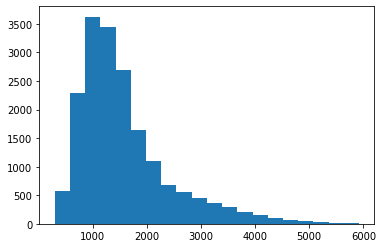

In [13]:
lyrics_len = np.array([len(lyr) for lyr in lyrics_cleaner["lyrics"]])
plt.hist(lyrics_len, bins=20);

# add interesting song metadata

In [14]:
df_concat = lyrics_cleaner.copy()
df_concat["explicit"] = df_songs_meta["explicit"].astype(int)
df_concat["artists_dict"] = df_songs_meta["artists"]
df_concat["song_name"] = df_songs_meta["song_name"]
df_concat["song_popularity"] = df_songs_meta["popularity"]
df_concat["release_date"] = df_tracks_meta["release_date"]

acoustic_features = ["mode", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", "tempo"]
for af in acoustic_features:
    df_concat[af] = df_acoustic_features[af]

print(df_concat.shape)
df_concat.head(10)

(18353, 16)


,lyrics,explicit,artists_dict,song_name,song_popularity,release_date,mode,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
song_id,,,,,,,,,,,,,,,,
3e9HZxeyfWwjeyPAMmWSSQ,Thought I'd end up with Sean. But he wasn't a ...,1,{'66CXWjxzNUsdJxJ2JdwvnR': 'Ariana Grande'},"thank u, next",86,2019-02-08,1,0.22900,0.717,0.653,0.000000,0.1010,-5.634,0.0658,0.412,106.966
5p7ujcrUXASCNwRaWNHR1C,Found you when your heart was broke. I filled ...,1,{'26VFTg2z8YR0cCuwLzESi2': 'Halsey'},Without Me,87,2018-10-04,1,0.29700,0.752,0.488,0.000009,0.0936,-7.050,0.0705,0.533,136.041
2xLMifQCjDGFmkHkpNLD9h,"Astro, yeah. Sun is down, freezin' cold. That'...",1,{'0Y5tJX1MQlPlqiwlOH1tJY': 'Travis Scott'},SICKO MODE,85,2018-08-03,1,0.00513,0.834,0.730,0.000000,0.1240,-3.714,0.2220,0.446,155.008
1rqqCSm0Qe4I9rUvWncaom,"High, high hopes. Had to have high, high hopes...",0,{'20JZFwl6HVl6yg8a4H3ZqK': 'Panic! At The Disco'},High Hopes,86,2018-06-22,1,0.19300,0.579,0.904,0.000000,0.0640,-2.729,0.0618,0.681,82.014
0bYg9bo50gSsH3LtXe2SQn,I-I-I don't want a lot for Christmas. There is...,0,{'4iHNK0tOyZPYnBU7nGAgpQ': 'Mariah Carey'},All I Want for Christmas Is You,63,1994-11-01,1,0.16400,0.335,0.625,0.000000,0.0708,-7.462,0.0386,0.346,150.277
5hslUAKq9I9CG2bAulFkHN,It's the most wonderful time of the year. With...,0,{'4sj6D0zlMOl25nprDJBiU9': 'Andy Williams'},It's the Most Wonderful Time of the Year,52,1963,1,0.76600,0.240,0.598,0.000000,0.1170,-8.435,0.0370,0.776,202.082
2EjXfH91m7f8HiJN1yQg97,Rockin' around the Christmas Tree. At the Chri...,0,{'4cPHsZM98sKzmV26wlwD2W': 'Brenda Lee'},Rockin' Around The Christmas Tree,53,1964-10-19,1,0.61400,0.589,0.472,0.000000,0.5050,-8.749,0.0502,0.898,67.196
0MMSmg7zyo6pOKZrfHUOqu,"Have a holly, jolly Christmas;. It's the best ...",0,{'0MHgLfmQdutffmvWe5XBTN': 'Burl Ives'},A Holly Jolly Christmas,3,2015-10-28,1,0.68500,0.665,0.398,0.000000,0.1720,-11.886,0.0300,0.864,140.456
6Z924AupOiJLdnAKH6UgCu,"Jingle bell, jingle bell, jingle bell rock. Ji...",0,{'38EmEgXkgK51MT2tPY0EoC': 'Bobby Helms'},Jingle Bell Rock,51,1983-01-01,1,0.65100,0.757,0.428,0.000000,0.0644,-8.537,0.0360,0.816,119.813


In [15]:
# clean song title
def get_title(n):
    return n.split(" - ")[0]


song_names_full = df_concat["song_name"]
# print(song_names_full)
song_names = [get_title(n) for n in song_names_full]
# print(song_names)
df_concat["song_name"] = song_names

# extract just year / decade

In [16]:
def get_year(date):
    return int(date[:4])


release_dates = df_concat["release_date"]
# print(release_dates)
years = [get_year(date) for date in release_dates]
# print(years)

df_concat["release_year"] = years
df_concat = df_concat.drop(columns=["release_date"])
df_concat.head()

,lyrics,explicit,artists_dict,song_name,song_popularity,mode,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,release_year
song_id,,,,,,,,,,,,,,,,
3e9HZxeyfWwjeyPAMmWSSQ,Thought I'd end up with Sean. But he wasn't a ...,1,{'66CXWjxzNUsdJxJ2JdwvnR': 'Ariana Grande'},"thank u, next",86,1,0.22900,0.717,0.653,0.000000,0.1010,-5.634,0.0658,0.412,106.966,2019
5p7ujcrUXASCNwRaWNHR1C,Found you when your heart was broke. I filled ...,1,{'26VFTg2z8YR0cCuwLzESi2': 'Halsey'},Without Me,87,1,0.29700,0.752,0.488,0.000009,0.0936,-7.050,0.0705,0.533,136.041,2018
2xLMifQCjDGFmkHkpNLD9h,"Astro, yeah. Sun is down, freezin' cold. That'...",1,{'0Y5tJX1MQlPlqiwlOH1tJY': 'Travis Scott'},SICKO MODE,85,1,0.00513,0.834,0.730,0.000000,0.1240,-3.714,0.2220,0.446,155.008,2018
1rqqCSm0Qe4I9rUvWncaom,"High, high hopes. Had to have high, high hopes...",0,{'20JZFwl6HVl6yg8a4H3ZqK': 'Panic! At The Disco'},High Hopes,86,1,0.19300,0.579,0.904,0.000000,0.0640,-2.729,0.0618,0.681,82.014,2018
0bYg9bo50gSsH3LtXe2SQn,I-I-I don't want a lot for Christmas. There is...,0,{'4iHNK0tOyZPYnBU7nGAgpQ': 'Mariah Carey'},All I Want for Christmas Is You,63,1,0.16400,0.335,0.625,0.000000,0.0708,-7.462,0.0386,0.346,150.277,1994


# add artist metadata

In [17]:
try:
    df_artists_meta = df_artists_meta.set_index('artist_id')
except:
    # already done
    pass

In [18]:
df_artists_meta.head(10)
# do histogram of all genres, and take the one most popular

,name,followers,popularity,artist_type,main_genre,genres,image_url
artist_id,,,,,,,
66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,34554242,96,singer,dance pop,"['dance pop', 'pop', 'post-teen pop']",https://i.scdn.co/image/b1dfbe843b0b9f54ab2e58...
26VFTg2z8YR0cCuwLzESi2,Halsey,7368242,90,singer,dance pop,"['dance pop', 'electropop', 'etherpop', 'indie...",https://i.scdn.co/image/22a5f3d8c42bc7cb55215e...
0Y5tJX1MQlPlqiwlOH1tJY,Travis Scott,6313709,94,rapper,pop,"['pop', 'pop rap', 'rap']",https://i.scdn.co/image/dc5eba5e032c2e5bc4d42c...
246dkjvS1zLTtiykXe5h60,Post Malone,16737002,96,rapper,dfw rap,"['dfw rap', 'pop', 'rap']",https://i.scdn.co/image/f9d8b742b66609f12da023...
1zNqQNIdeOUZHb8zbZRFMX,Swae Lee,483032,89,singer,trap music,['trap music'],https://i.scdn.co/image/a177469870b41f7e17e3b5...
64KEffDW9EtZ1y2vBYgq8T,Marshmello,15566666,91,DJ,brostep,"['brostep', 'progressive electro house']",https://i.scdn.co/image/65f40b9a99ebb96921d536...
7EQ0qTo7fWT7DPxmxtSYEc,Bastille,3776115,85,band,metropopolis,"['metropopolis', 'modern rock', 'pop', 'tropic...",https://i.scdn.co/image/7fd538c4aa21542d840e17...
20JZFwl6HVl6yg8a4H3ZqK,Panic! At The Disco,7749228,88,band,baroque pop,"['baroque pop', 'emo', 'modern rock', 'pop punk']",https://i.scdn.co/image/58518a04cdd1f20a24cf05...
4iHNK0tOyZPYnBU7nGAgpQ,Mariah Carey,4682308,81,singer,dance pop,"['dance pop', 'pop', 'r&b', 'urban contemporary']",https://i.scdn.co/image/b9e312cf57cca3fab33e3d...


In [19]:
def get_artists(artist_dict, i=0):
    artist_dict = ast.literal_eval(artist_dict)
    artists = list(artist_dict.values())
    if "Unknown" in artists:
        artists.remove("Unknown")
    return artists

def get_genres(artist_dict, i=0):
    artist_dict = ast.literal_eval(artist_dict)
    artist_keys = list(artist_dict.keys())
    genres = []
    for artist in artist_keys:
        try:
            genres += ast.literal_eval(df_artists_meta.loc[artist]["genres"])
        except:
            # not in artist metadata
            continue
    if len(genres) == 0:
        genres = np.nan
    return genres

def get_main_genre(artist_dict, i=0):
    artist_dict = ast.literal_eval(artist_dict)
    artist_keys = list(artist_dict.keys())
    main_genre = []
    for artist in artist_keys:
        try:
            artist_main_genre = df_artists_meta.loc[artist]["main_genre"]
            if artist_main_genre != "-":
                main_genre.append(artist_main_genre)
        except:
            # not in artist metadata
            continue
    if len(main_genre) == 0:
        main_genre = np.nan
    return main_genre


artist_dicts = df_concat["artists_dict"]
artists = [get_artists(artist_dict, i) for i, artist_dict in enumerate(artist_dicts)]
genres = [get_genres(artist_dict, i) for i, artist_dict in enumerate(artist_dicts)]
h = np.sum([1 if g is np.nan else 0  for g in genres])
print(f"number of songs with no genre : {h}")
main_genre = [get_main_genre(artist_dict, i) for i, artist_dict in enumerate(artist_dicts)]
h = np.sum([1 if g is np.nan else 0  for g in main_genre])
print(f"number of songs with no main genre : {h}")

# add columns to main dataframe
df_concat["artists"] = artists
df_concat["genres"] = genres
df_concat["main_genre"] = main_genre
df_concat.head()

number of songs with no genre : 1468
number of songs with no main genre : 1468


,lyrics,explicit,artists_dict,song_name,song_popularity,mode,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,release_year,artists,genres,main_genre
song_id,,,,,,,,,,,,,,,,,,,
3e9HZxeyfWwjeyPAMmWSSQ,Thought I'd end up with Sean. But he wasn't a ...,1,{'66CXWjxzNUsdJxJ2JdwvnR': 'Ariana Grande'},"thank u, next",86,1,0.22900,0.717,0.653,0.000000,0.1010,-5.634,0.0658,0.412,106.966,2019,[Ariana Grande],"[dance pop, pop, post-teen pop]",[dance pop]
5p7ujcrUXASCNwRaWNHR1C,Found you when your heart was broke. I filled ...,1,{'26VFTg2z8YR0cCuwLzESi2': 'Halsey'},Without Me,87,1,0.29700,0.752,0.488,0.000009,0.0936,-7.050,0.0705,0.533,136.041,2018,[Halsey],"[dance pop, electropop, etherpop, indie poptim...",[dance pop]
2xLMifQCjDGFmkHkpNLD9h,"Astro, yeah. Sun is down, freezin' cold. That'...",1,{'0Y5tJX1MQlPlqiwlOH1tJY': 'Travis Scott'},SICKO MODE,85,1,0.00513,0.834,0.730,0.000000,0.1240,-3.714,0.2220,0.446,155.008,2018,[Travis Scott],"[pop, pop rap, rap]",[pop]
1rqqCSm0Qe4I9rUvWncaom,"High, high hopes. Had to have high, high hopes...",0,{'20JZFwl6HVl6yg8a4H3ZqK': 'Panic! At The Disco'},High Hopes,86,1,0.19300,0.579,0.904,0.000000,0.0640,-2.729,0.0618,0.681,82.014,2018,[Panic! At The Disco],"[baroque pop, emo, modern rock, pop punk]",[baroque pop]
0bYg9bo50gSsH3LtXe2SQn,I-I-I don't want a lot for Christmas. There is...,0,{'4iHNK0tOyZPYnBU7nGAgpQ': 'Mariah Carey'},All I Want for Christmas Is You,63,1,0.16400,0.335,0.625,0.000000,0.0708,-7.462,0.0386,0.346,150.277,1994,[Mariah Carey],"[dance pop, pop, r&b, urban contemporary]",[dance pop]


In [20]:
print(f"before : {len(df_concat)}")
df_concat = df_concat.dropna()
print(f"after : {len(df_concat)}")

before : 18353
after : 16885


# clean up genres

In [21]:
# df_less_genre.loc[df_less_genre["main_genre"] == genre_mapping["classic rock"]].head(50)

# # todo : genres, main_genre, artists
# feat = ["genres", "main_genre", "artists"]
# for f in feat:
#     print(f"\n{f}")
#     print("-------------")
#     vals = []
#     for g in df_concat[f].values:
#         vals += g
#     n_vals = len(vals)
#     print(f"number of vals : {n_vals}")
#     n_diff_vals = len(list(set(list(vals))))
#     print(f"number of different vals : {n_diff_vals}")

# min_songs = 100

# main_genre = df_concat["main_genre"].values
# vals = []
# for g in main_genre:
#     vals += g
# h = pd.Series(vals).value_counts()
# mask = (h >= min_songs).values
# n_genres = np.sum(mask)
# print(f"{n_genres} genres with at least {min_songs} songs\n")
# print(h[:n_genres])

# unique_main_genres = list(set(list(vals)))
# sub_genres = [val for val in unique_main_genres if "rock" in val]
# print(sub_genres)

In [22]:
# https://www.musicianwave.com/top-music-genres/
genres = ["dance/electronic", "adult standards", "hip-hop/rap", "religious", "boy band", "r&b", "pop rap", "soft rock",
          "rock", "pop", "acoustic/folk", "soul/motown", "country", "jazz/blues/funk", "pop rock", "classic rock",
          "indie/alternative", "reggae", "christmas", "latin", "christian", "movie", "disco", "hard rock/metal"]
genre_mapping = {}
for i, g in enumerate(genres):
    genre_mapping[g] = i



df_less_genre = df_concat.copy()


# pop rap
mask = np.logical_and(
    ["pop" in str(g) for g in df_less_genre['genres']],
    ["rap" in str(g) for g in df_less_genre['genres']]
)
# mask = ["pop rap" in str(g) for g in df_less_genre['genres']]
print("pop rap", sum(mask))
df_less_genre.loc[mask, "main_genre"] = genre_mapping["pop rap"]
# df_less_genre.loc[mask, "genres"] = genre_mapping["pop rap"]

# christmas
mask = np.logical_or(np.logical_or(np.logical_or(np.logical_or(
df_less_genre['song_name'].str.contains("christmas", case=False),
df_less_genre['song_name'].str.contains("santa ", case=False)), 
df_less_genre['song_name'].str.contains("let it snow", case=False)), 
df_less_genre['song_name'].str.contains("rudolph", case=False)),
df_less_genre['song_name'].str.contains("xmas", case=False))
print("christmas", sum(mask))
df_less_genre.loc[mask, "main_genre"] = genre_mapping["christmas"]
df_less_genre.loc[mask, "genres"] = genre_mapping["christmas"]


# christian
mask = np.logical_or(np.logical_or(
    ["worship" in str(g) for g in df_less_genre['genres']],
    ["christian" in str(g) for g in df_less_genre['genres']]
), ["gospel" in str(g) for g in df_less_genre['genres']])
print("religious", sum(mask))
df_less_genre.loc[mask, "main_genre"] = genre_mapping["religious"]
# df_less_genre.loc[mask, "genres"] = genre_mapping["religious"]

# latin music
mask = np.logical_or(np.logical_or(np.logical_or(np.logical_or(
    ["latin" in str(g) for g in df_less_genre['genres']],
    ["reggaeton" in str(g) for g in df_less_genre['genres']]
), ["bossa nova" in str(g) for g in df_less_genre['genres']]
), ["bachata" in str(g) for g in df_less_genre['genres']]
), ["salsa" in str(g) for g in df_less_genre['genres']])
print("latin", sum(mask))
df_less_genre.loc[mask, "main_genre"] = genre_mapping["latin"]
df_less_genre.loc[mask, "genres"] = genre_mapping["latin"]


mask = np.logical_or(
    ["reggae" in str(g) for g in df_less_genre['genres']],
    ["dancehall" in str(g) for g in df_less_genre['genres']]
)
print("reggae", sum(mask))
df_less_genre.loc[mask, "main_genre"] = genre_mapping["reggae"]
# df_less_genre.loc[mask, "genres"] = genre_mapping["reggae"]


# mask = ["boy band" in str(g) for g in df_less_genre['genres']]
# print("boy band", sum(mask))
# df_less_genre.loc[mask, "main_genre"] = genre_mapping["boy band"]

mask = ["disco" in str(g) for g in df_less_genre['main_genre']]
print("disco", sum(mask))
df_less_genre.loc[mask, "main_genre"] = genre_mapping["disco"]
# df_less_genre.loc[mask, "genres"] = genre_mapping["disco"]

mask = np.logical_or(np.logical_or(np.logical_or(
    ["hollywood" in str(g) for g in df_less_genre['main_genre']],
    ["movie" in str(g) for g in df_less_genre['main_genre']]
), ["soundtrack" in str(g) for g in df_less_genre['main_genre']]), 
["disney" in str(g) for g in df_less_genre['main_genre']])
print("movie", sum(mask))
df_less_genre.loc[mask, "main_genre"] = genre_mapping["movie"]
# df_less_genre.loc[mask, "genres"] = genre_mapping["movie"]


# electronic
mask = np.logical_or(np.logical_or(np.logical_or(np.logical_or(np.logical_or(
    ["techno" in str(g) for g in df_less_genre['main_genre']],
    ["house" in str(g) for g in df_less_genre['main_genre']]
), ["edm" in str(g) for g in df_less_genre['main_genre']]), 
["electronic" in str(g) for g in df_less_genre['main_genre']]), 
["step" in str(g) for g in df_less_genre['main_genre']]),
["dance" in str(g) for g in df_less_genre['main_genre']])   # include dance pop
print("dance/electronic", sum(mask))
df_less_genre.loc[mask, "main_genre"] = genre_mapping["dance/electronic"]
# df_less_genre.loc[mask, "genres"] = genre_mapping["dance/electronic"]


# mask = np.array(["dance pop" in str(g) for g in df_less_genre['main_genre']])
# print("dance pop", sum(mask))
# df_less_genre.loc[mask, "main_genre"] = genre_mapping["dance pop"]

# mask = ["soft rock" in str(g) for g in df_less_genre['genres']]
# print("soft rock", sum(mask))
# df_less_genre.loc[mask, "main_genre"] = genre_mapping["soft rock"]
# df_less_genre.loc[mask, "genres"] = genre_mapping["soft rock"]


mask = np.logical_or(np.logical_or(np.logical_or(
    ["brill building pop" in str(g) for g in df_less_genre['main_genre']],
    ["easy" in str(g) for g in df_less_genre['main_genre']]
), ["adult" in str(g) for g in df_less_genre['main_genre']]
), ["british invasion" in str(g) for g in df_less_genre['main_genre']]
)
print("adult standards", sum(mask))
df_less_genre.loc[mask, "main_genre"] = genre_mapping["adult standards"]
# df_less_genre.loc[mask, "genres"] = genre_mapping["adult standards"]


mask = np.logical_or(np.logical_or(np.logical_or(
    ["rap" in str(g) for g in df_less_genre['main_genre']],
    ["hop" in str(g) for g in df_less_genre['main_genre']]
), ["g funk" in str(g) for g in df_less_genre['main_genre']]
), ["freestyle" in str(g) for g in df_less_genre['main_genre']])
print("hip-hop", sum(mask))
df_less_genre.loc[mask, "main_genre"] = genre_mapping["hip-hop/rap"]
# df_less_genre.loc[mask, "genres"] = genre_mapping["hip-hop/rap"]


# acoustic
mask = np.logical_or(
    ["acoustic" in str(g) for g in df_less_genre['main_genre']],
    ["folk" in str(g) for g in df_less_genre['main_genre']]
)
print("acoustic/folk", sum(mask))
df_less_genre.loc[mask, "main_genre"] = genre_mapping["acoustic/folk"]
# df_less_genre.loc[mask, "genres"] = genre_mapping["acoustic/folk"]


# soul
mask = np.logical_or(
    ["soul" in str(g) for g in df_less_genre['main_genre']],
    ["motown" in str(g) for g in df_less_genre['main_genre']]
)   
print("soul/motown", sum(mask))
df_less_genre.loc[mask, "main_genre"] = genre_mapping["soul/motown"]
# df_less_genre.loc[mask, "genres"] = genre_mapping["soul/motown"]


# soul
mask = np.logical_or(np.logical_or(
    ["new jack swing" in str(g) for g in df_less_genre['main_genre']],
    ["girl group" in str(g) for g in df_less_genre['main_genre']]
), ["r&b" in str(g) for g in df_less_genre['main_genre']])     
print("r&b", sum(mask))
df_less_genre.loc[mask, "main_genre"] = genre_mapping["r&b"]
# df_less_genre.loc[mask, "genres"] = genre_mapping["r&b"]

# country music
mask = np.logical_or(np.logical_or(
    ["country" in str(g) for g in df_less_genre['main_genre']],
    ["southern" in str(g) for g in df_less_genre['main_genre']]
), ["bluegrass" in str(g) for g in df_less_genre['main_genre']])
print("country", sum(mask))
df_less_genre.loc[mask, "main_genre"] = genre_mapping["country"]
# df_less_genre.loc[mask, "genres"] = genre_mapping["country"]

# jazz
mask = np.logical_or(np.logical_or(
    ["jazz" in str(g) for g in df_less_genre['main_genre']],
    ["blues" in str(g) for g in df_less_genre['main_genre']]
), ["funk" in str(g) for g in df_less_genre['main_genre']])
print("jazz/blues/funk", sum(mask))
df_less_genre.loc[mask, "main_genre"] = genre_mapping["jazz/blues/funk"]
# df_less_genre.loc[mask, "genres"] = genre_mapping["jazz/blues/funk"]

# indie
mask = np.logical_or(np.logical_or(
    ["indie" in str(g) for g in df_less_genre['main_genre']],
    ["alternative" in str(g) for g in df_less_genre['main_genre']]
), ["punk" in str(g) for g in df_less_genre['main_genre']])
print("indie/alternative", sum(mask))
df_less_genre.loc[mask, "main_genre"] = genre_mapping["indie/alternative"]
# df_less_genre.loc[mask, "genres"] = genre_mapping["indie/alternative"]


mask = np.logical_or(
    ["hard rock" in str(g) for g in df_less_genre['genres']],
    ["metal" in str(g) for g in df_less_genre['genres']]
)
print("hard rock/metal", sum(mask))
df_less_genre.loc[mask, "main_genre"] = genre_mapping["hard rock/metal"]
df_less_genre.loc[mask, "genres"] = genre_mapping["hard rock/metal"]

mask = ["classic rock" in str(g) for g in df_less_genre['genres']]
print("classic rock", sum(mask))
df_less_genre.loc[mask, "main_genre"] = genre_mapping["classic rock"]
# df_less_genre.loc[mask, "genres"] = genre_mapping["classic rock"]


mask = np.logical_or(np.logical_or(np.logical_or(np.logical_or(
    ["pop rock" in str(g) for g in df_less_genre['main_genre']],
    ["permanent wave" in str(g) for g in df_less_genre['main_genre']]
), ["soft rock" in str(g) for g in df_less_genre['main_genre']]
), ["neo mellow" in str(g) for g in df_less_genre['main_genre']]
), ["pop rock" in str(g) for g in df_less_genre['genres']]
)
# print("pop rock", sum(mask))
# df_less_genre.loc[mask, "main_genre"] = genre_mapping["pop rock"]
# df_less_genre.loc[mask, "genres"] = genre_mapping["pop rock"]
mask = np.logical_or(np.logical_or(
    ["pop" in str(g) for g in df_less_genre['main_genre']],
    ["boy band" in str(g) for g in df_less_genre['genres']]
), mask)
print("pop", sum(mask))
df_less_genre.loc[mask, "main_genre"] = genre_mapping["pop"]
# df_less_genre.loc[mask, "genres"] = genre_mapping["pop"]


# album rock
mask = np.logical_or(
    ["rock" in str(g) for g in df_less_genre['main_genre']],
    ["metal" in str(g) for g in df_less_genre['main_genre']]
)
print("rock", sum(mask))
df_less_genre.loc[mask, "main_genre"] = genre_mapping["rock"]
# df_less_genre.loc[mask, "genres"] = genre_mapping["rock"]

# mask = np.array(
#     ["pop" in str(g) for g in df_less_genre['main_genre']],
# )



# gen = "beach music"
# mask = [gen in str(g) for g in df_less_genre['main_genre']]
# print(gen, sum(mask))
# df_less_genre.loc[mask, "main_genre"] = gen



df_less_genre.head(20)

pop rap 1756
christmas 31
religious 374
latin 169
reggae 92
disco 457
movie 110
dance/electronic 1549
adult standards 2412
hip-hop 494
acoustic/folk 319
soul/motown 1215
r&b 153
country 1357
jazz/blues/funk 496
indie/alternative 553
hard rock/metal 1498
classic rock 1218
pop 2369
rock 795


,lyrics,explicit,artists_dict,song_name,song_popularity,mode,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,release_year,artists,genres,main_genre
song_id,,,,,,,,,,,,,,,,,,,
3e9HZxeyfWwjeyPAMmWSSQ,Thought I'd end up with Sean. But he wasn't a ...,1,{'66CXWjxzNUsdJxJ2JdwvnR': 'Ariana Grande'},"thank u, next",86,1,0.22900,0.717,0.653,0.000000,0.1010,-5.634,0.0658,0.412,106.966,2019,[Ariana Grande],"[dance pop, pop, post-teen pop]",0
5p7ujcrUXASCNwRaWNHR1C,Found you when your heart was broke. I filled ...,1,{'26VFTg2z8YR0cCuwLzESi2': 'Halsey'},Without Me,87,1,0.29700,0.752,0.488,0.000009,0.0936,-7.050,0.0705,0.533,136.041,2018,[Halsey],"[dance pop, electropop, etherpop, indie poptim...",0
2xLMifQCjDGFmkHkpNLD9h,"Astro, yeah. Sun is down, freezin' cold. That'...",1,{'0Y5tJX1MQlPlqiwlOH1tJY': 'Travis Scott'},SICKO MODE,85,1,0.00513,0.834,0.730,0.000000,0.1240,-3.714,0.2220,0.446,155.008,2018,[Travis Scott],"[pop, pop rap, rap]",6
1rqqCSm0Qe4I9rUvWncaom,"High, high hopes. Had to have high, high hopes...",0,{'20JZFwl6HVl6yg8a4H3ZqK': 'Panic! At The Disco'},High Hopes,86,1,0.19300,0.579,0.904,0.000000,0.0640,-2.729,0.0618,0.681,82.014,2018,[Panic! At The Disco],"[baroque pop, emo, modern rock, pop punk]",9
0bYg9bo50gSsH3LtXe2SQn,I-I-I don't want a lot for Christmas. There is...,0,{'4iHNK0tOyZPYnBU7nGAgpQ': 'Mariah Carey'},All I Want for Christmas Is You,63,1,0.16400,0.335,0.625,0.000000,0.0708,-7.462,0.0386,0.346,150.277,1994,[Mariah Carey],18,18
5hslUAKq9I9CG2bAulFkHN,It's the most wonderful time of the year. With...,0,{'4sj6D0zlMOl25nprDJBiU9': 'Andy Williams'},It's the Most Wonderful Time of the Year,52,1,0.76600,0.240,0.598,0.000000,0.1170,-8.435,0.0370,0.776,202.082,1963,[Andy Williams],"[adult standards, brill building pop, easy lis...",1
2EjXfH91m7f8HiJN1yQg97,Rockin' around the Christmas Tree. At the Chri...,0,{'4cPHsZM98sKzmV26wlwD2W': 'Brenda Lee'},Rockin' Around The Christmas Tree,53,1,0.61400,0.589,0.472,0.000000,0.5050,-8.749,0.0502,0.898,67.196,1964,[Brenda Lee],18,18
0MMSmg7zyo6pOKZrfHUOqu,"Have a holly, jolly Christmas;. It's the best ...",0,{'0MHgLfmQdutffmvWe5XBTN': 'Burl Ives'},A Holly Jolly Christmas,3,1,0.68500,0.665,0.398,0.000000,0.1720,-11.886,0.0300,0.864,140.456,2015,[Burl Ives],18,18
1xzBco0xcoJEDXktl7Jxrr,16yrold. Bitch!. Daytrip took it to 10. I got ...,1,{'2RDOrhPqAM4jzTRCEb19qX': 'Sheck Wes'},Mo Bamba,81,1,0.19400,0.729,0.625,0.009860,0.2480,-5.266,0.0315,0.261,146.034,2018,[Sheck Wes],"[rap, trap music, underground hip hop, vapor t...",2


In [23]:
min_songs = 5

main_genre = df_less_genre["main_genre"].values
vals = []
for g in main_genre:
    if isinstance(g, list):
        vals += g
    else:
        vals += [genres[g]]
h = pd.Series(vals).value_counts()
# print(h[::-1][:100])
mask = (h >= min_songs).values
n_genres = np.sum(mask)
print(f"{n_genres} genres with at least {min_songs} songs\n")
print(h[:n_genres])

47 genres with at least 5 songs

pop                           2369
adult standards               2209
pop rap                       1610
hard rock/metal               1498
dance/electronic              1417
country                       1295
soul/motown                   1212
classic rock                  1114
rock                           795
hip-hop/rap                    487
disco                          456
jazz/blues/funk                358
religious                      357
karaoke                        327
acoustic/folk                  199
latin                          169
r&b                            151
indie/alternative              141
movie                          110
reggae                          90
beach music                     55
mellow gold                     49
christmas                       31
emo                             28
fake                            24
electro                         20
minneapolis sound               16
quiet storm           

In [24]:
# remove obscure genres
mask = np.array(
    [isinstance(g, list) for g in df_less_genre['main_genre']],
)
print("unclassified songs", sum(mask))
df_less_genre.loc[mask, "main_genre"] = np.nan

unclassified songs 817


In [25]:
print(f"before : {len(df_less_genre)}")
df_clean = df_less_genre.dropna()
print(f"after : {len(df_clean)}")


def get_genre(n):
    return genres[n]

def get_artist(n):
    # just take first artist
    return n[0]

df_clean["genre"] = [get_genre(n) for n in df_clean["main_genre"]]
df_clean["artist"] = [get_artist(n) for n in df_clean["artists"]]


# df_clean = df_clean.drop(columns=['genres', 'main_genre', "artists_dict", "artists"])
df_clean = df_clean.drop(columns=['main_genre', "artists_dict", "artists"])


df_clean.head(30)

before : 16885
after : 16068


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,lyrics,explicit,song_name,song_popularity,mode,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,release_year,genres,genre,artist
song_id,,,,,,,,,,,,,,,,,,
3e9HZxeyfWwjeyPAMmWSSQ,Thought I'd end up with Sean. But he wasn't a ...,1,"thank u, next",86,1,0.22900,0.717,0.653,0.000000,0.1010,-5.634,0.0658,0.412,106.966,2019,"[dance pop, pop, post-teen pop]",dance/electronic,Ariana Grande
5p7ujcrUXASCNwRaWNHR1C,Found you when your heart was broke. I filled ...,1,Without Me,87,1,0.29700,0.752,0.488,0.000009,0.0936,-7.050,0.0705,0.533,136.041,2018,"[dance pop, electropop, etherpop, indie poptim...",dance/electronic,Halsey
2xLMifQCjDGFmkHkpNLD9h,"Astro, yeah. Sun is down, freezin' cold. That'...",1,SICKO MODE,85,1,0.00513,0.834,0.730,0.000000,0.1240,-3.714,0.2220,0.446,155.008,2018,"[pop, pop rap, rap]",pop rap,Travis Scott
1rqqCSm0Qe4I9rUvWncaom,"High, high hopes. Had to have high, high hopes...",0,High Hopes,86,1,0.19300,0.579,0.904,0.000000,0.0640,-2.729,0.0618,0.681,82.014,2018,"[baroque pop, emo, modern rock, pop punk]",pop,Panic! At The Disco
0bYg9bo50gSsH3LtXe2SQn,I-I-I don't want a lot for Christmas. There is...,0,All I Want for Christmas Is You,63,1,0.16400,0.335,0.625,0.000000,0.0708,-7.462,0.0386,0.346,150.277,1994,18,christmas,Mariah Carey
5hslUAKq9I9CG2bAulFkHN,It's the most wonderful time of the year. With...,0,It's the Most Wonderful Time of the Year,52,1,0.76600,0.240,0.598,0.000000,0.1170,-8.435,0.0370,0.776,202.082,1963,"[adult standards, brill building pop, easy lis...",adult standards,Andy Williams
2EjXfH91m7f8HiJN1yQg97,Rockin' around the Christmas Tree. At the Chri...,0,Rockin' Around The Christmas Tree,53,1,0.61400,0.589,0.472,0.000000,0.5050,-8.749,0.0502,0.898,67.196,1964,18,christmas,Brenda Lee
0MMSmg7zyo6pOKZrfHUOqu,"Have a holly, jolly Christmas;. It's the best ...",0,A Holly Jolly Christmas,3,1,0.68500,0.665,0.398,0.000000,0.1720,-11.886,0.0300,0.864,140.456,2015,18,christmas,Burl Ives
1xzBco0xcoJEDXktl7Jxrr,16yrold. Bitch!. Daytrip took it to 10. I got ...,1,Mo Bamba,81,1,0.19400,0.729,0.625,0.009860,0.2480,-5.266,0.0315,0.261,146.034,2018,"[rap, trap music, underground hip hop, vapor t...",hip-hop/rap,Sheck Wes


# visualization

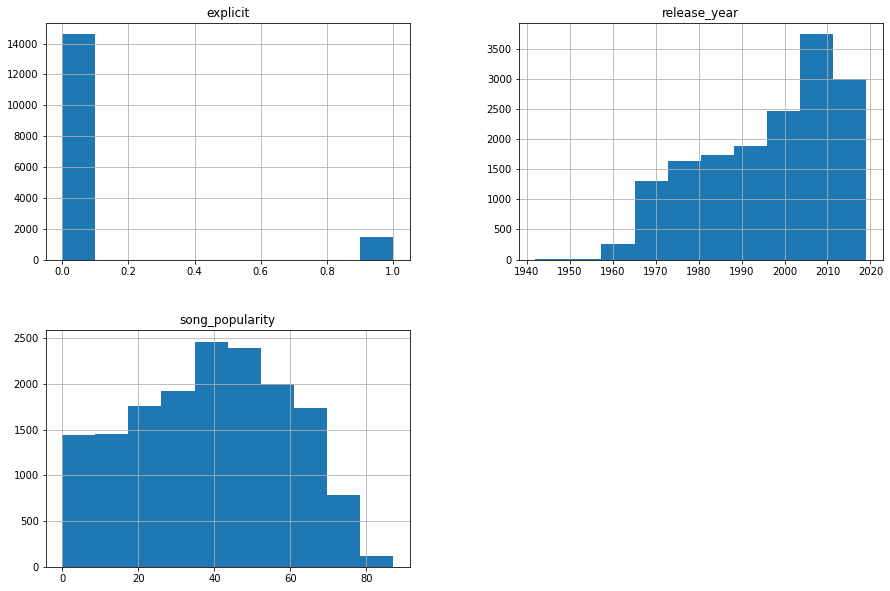

In [26]:
df_clean.hist(column=["song_popularity", "release_year", "explicit"], figsize=(15, 10));

In [27]:
df_clean.shape

(16068, 18)

In [28]:
print(len(df_clean["genre"].value_counts()))
df_clean["genre"].value_counts()

20


pop                  2369
adult standards      2209
pop rap              1610
hard rock/metal      1498
dance/electronic     1417
country              1295
soul/motown          1212
classic rock         1114
rock                  795
hip-hop/rap           487
disco                 456
jazz/blues/funk       358
religious             357
acoustic/folk         199
latin                 169
r&b                   151
indie/alternative     141
movie                 110
reggae                 90
christmas              31
Name: genre, dtype: int64

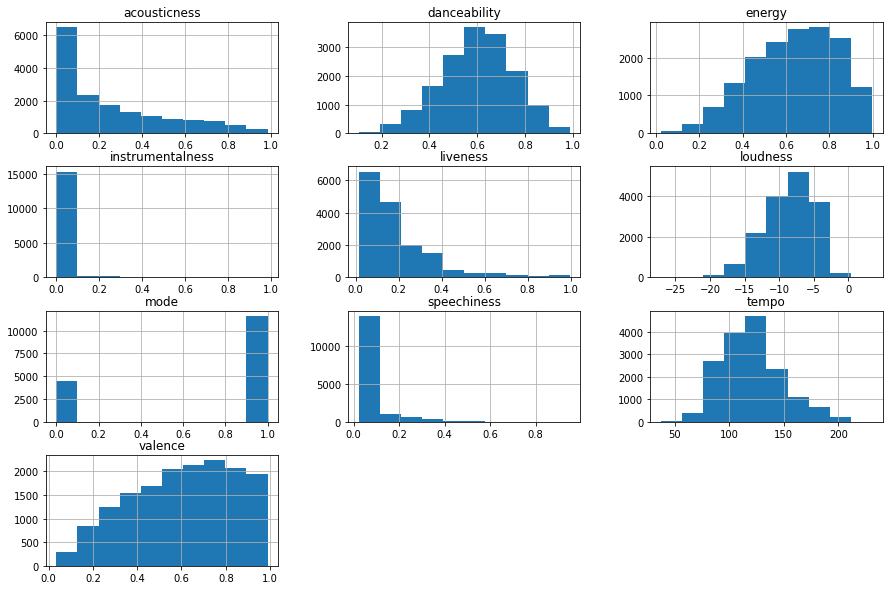

In [29]:
df_clean.hist(column=acoustic_features, figsize=(15, 10));

# max lyrics length and tokenize (?)

In [30]:
lyr_lengths = [len(lyr.split()) for lyr in df_clean["lyrics"]]
print("max", max(lyr_lengths))

max 1161


In [31]:
df_clean.iloc[np.argmax(lyr_lengths)]

lyrics              Shimmy shimmy cocoa-pop. Shimmy shimmy cocoa-p...
explicit                                                            0
song_name                                               Kiss You Back
song_popularity                                                    12
mode                                                                0
acousticness                                                    0.054
danceability                                                     0.88
energy                                                           0.63
instrumentalness                                                    0
liveness                                                        0.183
loudness                                                      -13.049
speechiness                                                    0.0904
valence                                                          0.79
tempo                                                         113.051
release_year        

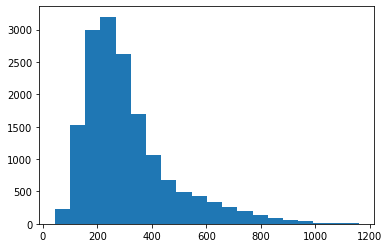

In [32]:
plt.hist(lyr_lengths, bins=20);

# BERT similarity

- https://towardsdatascience.com/bert-for-measuring-text-similarity-eec91c6bf9e1
- other sentence models: https://huggingface.co/sentence-transformers

In [33]:
from sentence_transformers import SentenceTransformer, util

sentences = [
    "Three years later, the coffin was still full of Jello.",
    "The fish dreamed of escaping the fishbowl and into the toilet where he saw his friend go.",
    "The person box was packed with jelly many dozens of months later.",
    "He found a leprechaun in his walnut shell."
]

In [34]:
# from Medium article but seems deprecated: https://huggingface.co/sentence-transformers/bert-base-nli-mean-tokens
bert_base = SentenceTransformer('bert-base-nli-mean-tokens')
# from offical doc: https://www.sbert.net/docs/usage/semantic_textual_similarity.html
mini_lim = SentenceTransformer('all-MiniLM-L6-v2')
# other (larger) recommended models: https://www.sbert.net/docs/pretrained_models.html
mpnet_base = SentenceTransformer('all-mpnet-base-v2')    # max length 384
mpnet_qa = SentenceTransformer('multi-qa-mpnet-base-dot-v1')   # max length 512


In [35]:
sentence_embeddings = bert_base.encode(sentences)
print(sentence_embeddings.shape)
cosine_scores = util.pytorch_cos_sim([sentence_embeddings[0]], sentence_embeddings[1:])
print(cosine_scores)

(4, 768)
tensor([[0.3309, 0.7219, 0.5548]])


/usr/local/lib/python3.6/dist-packages/sentence_transformers/util.py:29: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  a = torch.tensor(a)


In [36]:
sentence_embeddings = mini_lim.encode(sentences)
print(sentence_embeddings.shape)
cosine_scores = util.pytorch_cos_sim([sentence_embeddings[0]], sentence_embeddings[1:])
print(cosine_scores)

(4, 384)
tensor([[0.2206, 0.4764, 0.2274]])


In [37]:
sentence_embeddings = mpnet_base.encode(sentences)
print(sentence_embeddings.shape)
cosine_scores = util.pytorch_cos_sim([sentence_embeddings[0]], sentence_embeddings[1:])
print(cosine_scores)

(4, 768)
tensor([[0.1012, 0.6117, 0.2551]])


In [38]:
sentence_embeddings = mpnet_qa.encode(sentences)
print(sentence_embeddings.shape)
cosine_scores = util.pytorch_cos_sim([sentence_embeddings[0]], sentence_embeddings[1:])
print(cosine_scores)

(4, 768)
tensor([[0.3950, 0.6073, 0.4386]])


`all-mpnet-base-v2` seems promising

## try with song lyrics

In [39]:
def print_cos_sim_pairs(embeddings, song_names):
    #Compute cosine-similarits
    cosine_scores = util.pytorch_cos_sim(embeddings, embeddings)

    #Find the pairs with the highest cosine similarity scores
    pairs = []
    for i in range(len(cosine_scores)-1):
        for j in range(i+1, len(cosine_scores)):
            pairs.append({'index': [i, j], 'score': cosine_scores[i][j]})

    #Sort scores in decreasing order
    pairs = sorted(pairs, key=lambda x: x['score'], reverse=True)

    for pair in pairs:
        i, j = pair['index']
        print(f"Score: {pair['score']:.4f} \t {song_names[i]:50s} {song_names[j]:50s}")


print("xmas")
set1 = df_clean[df_clean["genre"] == "christmas"]
xmas = list(set1["lyrics"][:3].values)
xmas_names = list(set1["song_name"][:3].values)
print(xmas_names)
# print([len(lyr) for lyr in xmas])
print([len(lyr.split(" ")) for lyr in xmas])

print("\nrap")
# set2 = df_clean[df_clean["genre"] == "hip-hop/rap"]
set2 = df_clean[df_clean["artist"] == "Eminem"]
rap = list(set2["lyrics"][:3].values)
rap_names = list(set2["song_name"][:3].values)
print(rap_names)
# print([len(lyr) for lyr in xmas])
print([len(lyr.split(" ")) for lyr in xmas])

# concat
song_names = xmas_names + rap_names
song_lyrics = xmas + rap

xmas
['All I Want for Christmas Is You', "Rockin' Around The Christmas Tree", 'A Holly Jolly Christmas']
[369, 122, 86]

rap
['Killshot', 'Fall', 'Kamikaze']
[369, 122, 86]


In [40]:
print_cos_sim_pairs(mpnet_base.encode(song_lyrics), song_names)

Score: 0.6664 	 Killshot                                           Fall                                              
Score: 0.5865 	 Rockin' Around The Christmas Tree                  A Holly Jolly Christmas                           
Score: 0.5730 	 All I Want for Christmas Is You                    A Holly Jolly Christmas                           
Score: 0.5000 	 Killshot                                           Kamikaze                                          
Score: 0.4975 	 All I Want for Christmas Is You                    Rockin' Around The Christmas Tree                 
Score: 0.4630 	 Fall                                               Kamikaze                                          
Score: 0.2689 	 All I Want for Christmas Is You                    Kamikaze                                          
Score: 0.2473 	 A Holly Jolly Christmas                            Kamikaze                                          
Score: 0.2420 	 Rockin' Around The Christmas Tree       

bigger drop for bad pair: `0.4630 -> 0.2689` (for xmas vs eminem)

In [41]:
print_cos_sim_pairs(mpnet_qa.encode(song_lyrics), song_names)

Score: 0.7371 	 Rockin' Around The Christmas Tree                  A Holly Jolly Christmas                           
Score: 0.7340 	 Killshot                                           Fall                                              
Score: 0.6944 	 All I Want for Christmas Is You                    A Holly Jolly Christmas                           
Score: 0.6700 	 Killshot                                           Kamikaze                                          
Score: 0.6110 	 All I Want for Christmas Is You                    Rockin' Around The Christmas Tree                 
Score: 0.6023 	 Fall                                               Kamikaze                                          
Score: 0.5428 	 All I Want for Christmas Is You                    Killshot                                          
Score: 0.4872 	 All I Want for Christmas Is You                    Fall                                              
Score: 0.4738 	 A Holly Jolly Christmas                 

In [42]:
print_cos_sim_pairs(bert_base.encode(song_lyrics), song_names)

Score: 0.8341 	 Rockin' Around The Christmas Tree                  A Holly Jolly Christmas                           
Score: 0.7497 	 Killshot                                           Kamikaze                                          
Score: 0.7150 	 Fall                                               Kamikaze                                          
Score: 0.6892 	 All I Want for Christmas Is You                    A Holly Jolly Christmas                           
Score: 0.6781 	 All I Want for Christmas Is You                    Rockin' Around The Christmas Tree                 
Score: 0.6376 	 Killshot                                           Fall                                              
Score: 0.6214 	 All I Want for Christmas Is You                    Fall                                              
Score: 0.5569 	 A Holly Jolly Christmas                            Fall                                              
Score: 0.5139 	 Rockin' Around The Christmas Tree       

In [43]:
# what is the model doing for very long sentences?
longest_lyr = [df_clean.iloc[np.argmax(lyr_lengths)]["lyrics"]]
print(len(longest_lyr[0].split()))
embeddings = model.encode(longest_lyr)
print(embeddings.shape)

"""
https://huggingface.co/sentence-transformers/all-mpnet-base-v2
--> By default, input text longer than 384 word pieces is truncated.
"""

1161


NameError: name 'model' is not defined

# TODO
- need to clean up lyrics a bit / try to make them shorter (e.g. remove duplicate chorus etc)

other interesting tutorials
- similarity for long sentences (paraphrase mining): https://www.sbert.net/examples/applications/paraphrase-mining/README.html
- training textual similarity: https://www.sbert.net/examples/training/sts/README.html
- clustering example: https://www.sbert.net/examples/applications/clustering/README.html

In [57]:
from torch.utils.data import DataLoader
from sentence_transformers import SentenceTransformer, InputExample, losses

import torch 
import torch.nn as nn

from tqdm import tqdm

#### Define training model arch

In [46]:
class BertModelAttributes(nn.Module):
    def __init__(self,base_model,nouts):
        super(BertModelAttributes,self).__init__()
        
        self.base_model = base_model
        self.freeze_params(self.base_model)
        # dropout layer
        self.dropout = nn.Dropout(0.1)

        # relu activation function
        self.relu =  nn.ReLU()

        # dense layer 1
        self.fc1 = nn.Linear(768,512)

        # dense layer 2 (Output layer)
        self.fc2 = nn.Linear(512,nouts)
        
        self.sigmoid = nn.Sigmoid()
        
        self.tokenizer = self.base_model.tokenizer

    def freeze_params(self,net):
        for p in net.parameters():
            p.require_grads = False
        
    def forward(self,sent_id,mask):
        baseout = self.base_model({'input_ids':sent_id,'attention_mask':mask})
#         print(baseout.keys())
        x = self.fc1(baseout['sentence_embedding'])

        x = self.relu(x)

        x = self.dropout(x)

        # output layer
        x = self.fc2(x)

        # apply softmax activation
        x = self.sigmoid(x)

        return x

In [47]:
model = BertModelAttributes(mpnet_base,3)
tokenizer = model.tokenizer

#### Create the training dataset

In [48]:
def get_lyrs_data(genre,attributes):
    all_lyrs=[]
    all_attrs=torch.tensor([])
    for g in genre:
        lyrsd = df_clean #df_clean[df_clean["genre"] == g]
        lyrs = list(lyrsd["lyrics"][:].values)
        all_lyrs += lyrs
        
        attrs = []
        for a in attributes:
            attrs.append(lyrsd[a].to_list())
        attrs = torch.cat([torch.tensor(t).reshape(-1,1) for t in attrs],1)
        all_attrs = torch.cat([all_attrs,attrs],0)
    return all_lyrs,all_attrs

In [49]:
genres = ['christmas','pop','pop rap']
# attr = ['danceability','energy','valence']
attr = ['valence']
X,y = get_lyrs_data(genres,attr)
print(len(X),y.shape)

48204 torch.Size([48204, 1])


In [50]:

tokens_train = tokenizer.batch_encode_plus(
    X,
    max_length = 384,
    padding=True,
    truncation=True
)


In [51]:
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = y

#### Dataload

In [52]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

In [53]:
# optimizer from hugging face transformers
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(),lr = 1e-4)          # learning rate

In [54]:
def train():
    model.cuda()
    model.train()
    total_loss, total_accuracy = 0, 0
  
    all_loss = []
  
    # iterate over batches
    for step,batch in enumerate(tqdm(train_dataloader)):

        # push the batch to gpu
        batch = [r.to('cuda') for r in batch]

        sent_id, mask, labels = batch

        # clear previously calculated gradients 
        model.zero_grad()        

        # get model predictions for the current batch
        preds = model(sent_id, mask)

        # compute the loss between actual and predicted values
        loss = torch.mean((preds-labels)**2)

        all_loss.append(loss.item())


        # backward pass to calculate the gradients
        loss.backward()

        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
#         torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # update parameters
        optimizer.step()

    return all_loss

In [55]:
for i in range(1):
    loss = train()

100%|██████████| 1507/1507 [18:29<00:00,  1.36it/s]


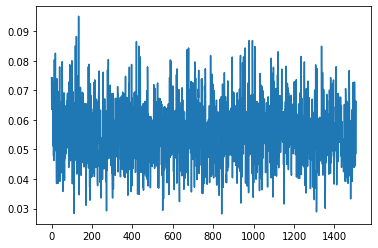

In [56]:
import matplotlib.pyplot as plt
plt.plot(loss)